In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a StandardScaler instance
scaler = StandardScaler() # initialize the StandardScaler




In [13]:
# Copy the cryptocurrency names from the original data
df["coin_name"] = df.index

# Display sample data after adding the coin_name column
print("Sample data after adding coin_name column:")
print(df.head(10))



# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])  # Exclude the last column "coin_name"

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df.columns[:-1], index=df.index)

# Add the "coin_name" column back to the scaled DataFrame
df_scaled["coin_name"] = df["coin_name"]

# Display sample data after scaling
print("\nSample data after scaling:")
print(df_scaled.head(10))





Sample data after adding coin_name column:
                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d

### Find the Best Value for k Using the Original Scaled DataFrame.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a list with the number of k-values to try
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)  # Set n_init explicitly
    model.fit(df_scaled.iloc[:, :-1])  # Using df_scaled instead of scaled_df
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow




,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


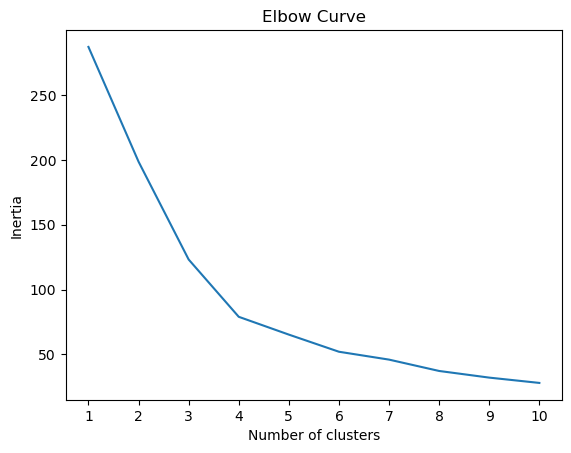

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(df_elbow["k"])
plt.title("Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()



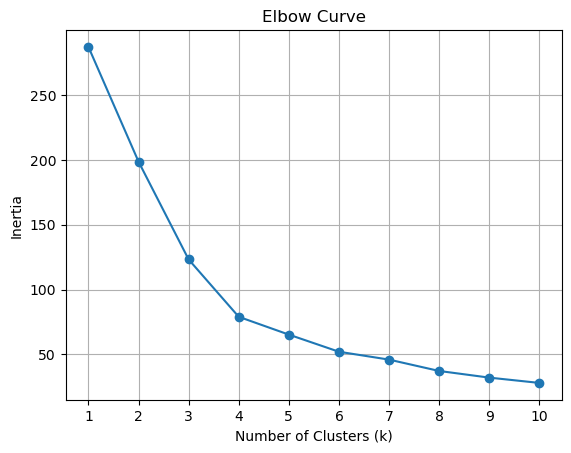

In [20]:
import matplotlib.pyplot as plt

# Plotting the Elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
The best value for k is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [21]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=42, n_init=10)



In [22]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled.iloc[:, :-1])  # Using df_scaled instead of scaled_df



KMeans(n_clusters=4, n_init=10, random_state=42)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
df_scaled["class"] = model.predict(df_scaled.iloc[:, :-1])  # Using df_scaled instead of scaled_df


# View the resulting array of cluster values.
df_scaled.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_name,class
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,binancecoin,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,chainlink,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,cardano,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,litecoin,0


In [24]:
# Create a copy of the DataFrame
df_class = df_scaled.copy()



In [30]:
# Assuming 'model' is your trained K-means model

# Predict the clusters for the DataFrame without the 'coin_name' and 'class' columns
predicted_clusters = model.predict(df_scaled.drop(columns=['coin_name', 'class']))

# Assign the predicted clusters back to your original DataFrame
df_class['class'] = predicted_clusters

# Display the first 10 rows of the df_class DataFrame
df_class.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_name,class
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,binancecoin,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,chainlink,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,cardano,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,litecoin,0


In [31]:
df_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,coin_name,class
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,binancecoin,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,chainlink,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,cardano,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,litecoin,0


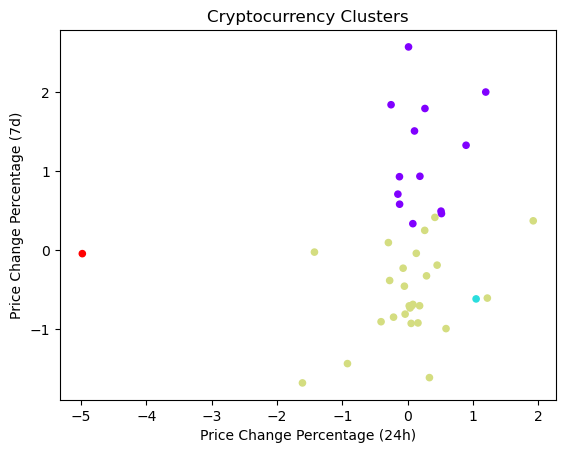

In [33]:
import matplotlib.pyplot as plt

# Assuming df_class is your DataFrame with the 'class' column included from your clustering

# Create a scatter plot
df_class.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="class", colormap="rainbow", colorbar=False)

# Set plot titles and labels
plt.title("Cryptocurrency Clusters")
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")

# Show the plot
plt.show()




### Optimize Clusters with Principal Component Analysis.

In [38]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)



In [40]:
from sklearn.decomposition import PCA

# Assuming 'df_scaled' is your DataFrame with only numeric features to fit PCA
# Make sure to exclude the 'coin_name' and 'class' columns as they are not features for PCA

# Fit the PCA model to the scaled data
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled.drop(columns=['coin_name', 'class']))

# The result 'df_pca' will be a NumPy array with 3 components. 
# To make it a DataFrame and carry the coin names and classes over, you can do:
df_pca = pd.DataFrame(data=df_pca, index=df_scaled.index, columns=['PC1', 'PC2', 'PC3'])

# Optionally, add the coin names and class back if needed
df_pca['coin_name'] = df_scaled['coin_name']
df_pca['class'] = df_scaled['class']

# Now you can use df_pca for further analysis or plotting
df_pca.head(10)



,PC1,PC2,PC3,coin_name,class
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,2
ripple,-0.471835,-0.222660,-0.479053,ripple,2
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0
binancecoin,-0.516534,1.388377,0.804071,binancecoin,0
chainlink,-0.450711,0.517699,2.846143,chainlink,0
cardano,-0.345600,0.729439,1.478013,cardano,0
litecoin,-0.649468,0.432165,0.600303,litecoin,0


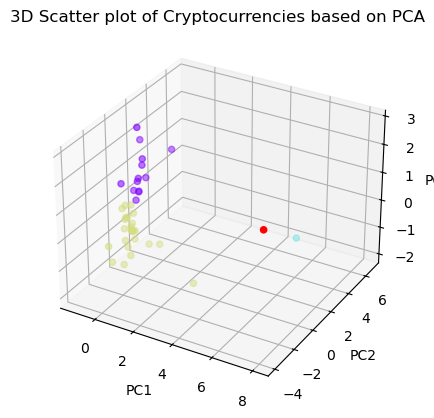

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3 principal components
# label='class' will color the points based on the class column
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['class'], cmap='rainbow')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter plot of Cryptocurrencies based on PCA')

plt.show()




In [45]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
explained_variance




array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The total explained variance of the first three principal components is approximately 89.5%. This means that the three components together capture about 89.5% of the total variance in your dataset.

In [47]:

# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2", "PC3"], index=df_scaled.index
)




# Copy the crypto names from the original data
df_pca["coin_name"] = df_scaled.index


# Set the coinid column as index
df_pca.set_index("coin_name", inplace=True)



# Display sample data
df_pca.head(10)




,PC1,PC2,PC3
coin_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

/Users/katadhin1/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katadhin1/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katadhin1/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katadhin1/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

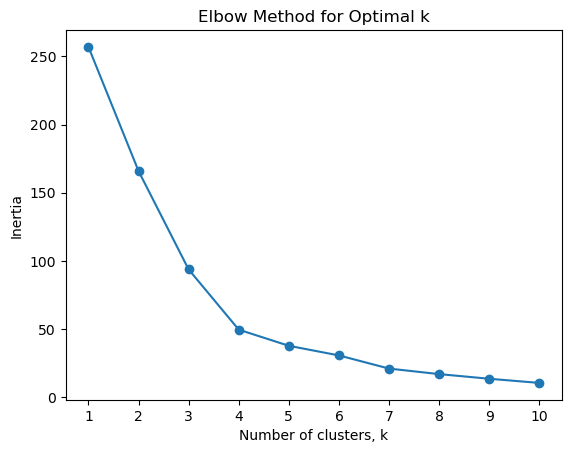

In [51]:
# Step 1: Determine the range of k values to test
k_values = range(1, 11)

# Step 2: Initialize an empty list to hold the inertia values
inertias = []

model = KMeans(n_clusters=k, n_init=10, random_state=42)


# Loop over the range of k values
for k in k_values:
    # Initialize the KMeans instance for each k
    model = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the PCA-transformed data
    model.fit(df_pca[['PC1', 'PC2', 'PC3']])  # Use your actual PCA DataFrame here
    # Append the model's inertia to the list
    inertias.append(model.inertia_)


# Step 4: Plot the k values against the inertia scores
plt.plot(k_values, inertias, '-o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

# Step 5: Use the plot to find the elbow point and determine the best k


In [52]:
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Create a list with the number of k-values to try
k_values = range(1, 11)

# Step 2: Create an empty list to store the inertia values
inertias = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    # 2. Fit the model to the data using PCA DataFrame.
    model.fit(df_pca[['PC1', 'PC2', 'PC3']])  # Make sure 'df_pca' is your PCA DataFrame
    # 3. Append the model.inertia_ to the inertia list
    inertias.append(model.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertias}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Step 6: Display the DataFrame
print(elbow_df)



    k     inertia
0   1  256.874086
1   2  165.901994
2   3   93.774626
3   4   49.665497
4   5   37.839466
5   6   30.777746
6   7   21.134056
7   8   17.091637
8   9   13.681140
9  10   10.630648


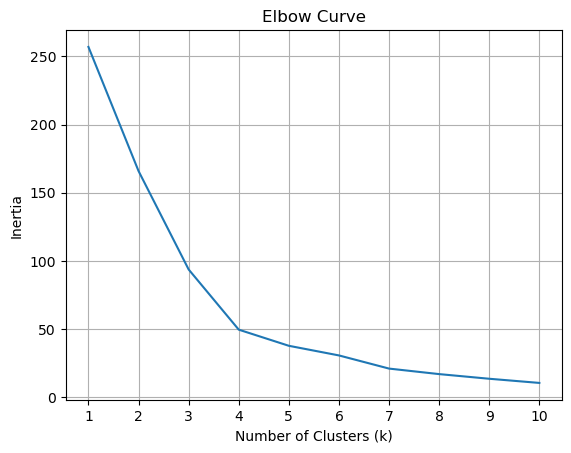

In [53]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()



#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [54]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=42, n_init=10)



In [55]:
# Fit the K-Means model using the PCA data
model.fit(df_pca[['PC1', 'PC2', 'PC3']])



KMeans(n_clusters=4, n_init=10, random_state=42)

In [56]:
# Predict the clusters to group the cryptocurrencies using the PCA data
df_pca['class'] = model.predict(df_pca[['PC1', 'PC2', 'PC3']])
# View the resulting array of cluster values.
df_pca.head(10)






,PC1,PC2,PC3,class
coin_name,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [57]:
# Assuming the DataFrame df_pca contains your PCA components
# and 'class' is a column you've used previously (perhaps you want to rename it to avoid confusion)

# Fit the K-means model to the PCA data
kmeans_pca = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_pca.fit(df_pca[['PC1', 'PC2', 'PC3']])

# Predict the clusters
df_pca['cluster'] = kmeans_pca.labels_

# Now df_pca contains the cluster assignments in the 'cluster' column
print(df_pca.head())


                   PC1       PC2       PC3  class  cluster
coin_name                                                 
bitcoin      -0.600667  0.842760  0.461595      0        0
ethereum     -0.458261  0.458466  0.952877      0        0
tether       -0.433070 -0.168126 -0.641752      2        2
ripple       -0.471835 -0.222660 -0.479053      2        2
bitcoin-cash -1.157800  2.041209  1.859715      0        0


In [58]:
# Create a copy of the DataFrame with the PCA data
df_pca_class = df_pca.copy()



# Add a new column to the DataFrame with the predicted clusters
df_pca_class["class"] = model.predict(df_pca[["PC1", "PC2", "PC3"]])



# Display sample data
df_pca_class.head(10)



,PC1,PC2,PC3,class,cluster
coin_name,,,,,
bitcoin,-0.600667,0.842760,0.461595,0,0
ethereum,-0.458261,0.458466,0.952877,0,0
tether,-0.433070,-0.168126,-0.641752,2,2
ripple,-0.471835,-0.222660,-0.479053,2,2
bitcoin-cash,-1.157800,2.041209,1.859715,0,0
binancecoin,-0.516534,1.388377,0.804071,0,0
chainlink,-0.450711,0.517699,2.846143,0,0
cardano,-0.345600,0.729439,1.478013,0,0
litecoin,-0.649468,0.432165,0.600303,0,0


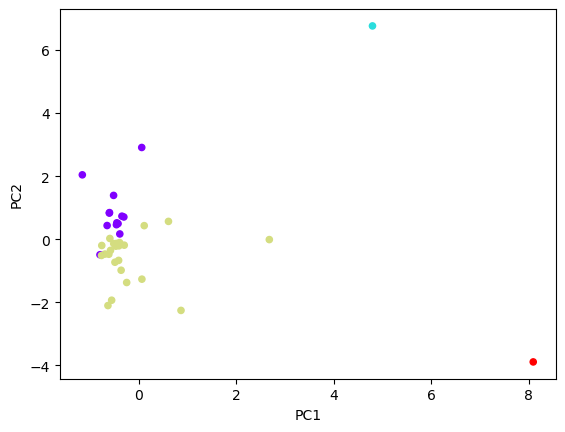

In [62]:


# Plotting the PCA data
# Assuming df_pca is your DataFrame and it contains 'PC1', 'PC2' columns for the PCA components
# The 'class' column is used to color the data points

# Create a scatter plot
df_pca_class.plot.scatter(x="PC1", y="PC2", c="class", colormap="rainbow", colorbar=False)



# Display the plot
plt.show()






In [61]:
import hvplot.pandas  # make sure you have hvplot installed

# Create a scatter plot
# Assuming 'PC1' and 'PC2' are the names of the columns with your PCA data
# And 'class' is the column with your cluster labels
plot = df_pca.hvplot.scatter(x='PC1', y='PC2', by='class', colormap='Category10', width=600, height=400)

# Display the plot
plot


:NdOverlay   [class]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [65]:
# Use the columns from the original scaled DataFrame as the index.
df_pca = pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2", "PC3"], index=df_scaled.index
)

# find the weights of the principal components
pca.explained_variance_ratio_

# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    data=df_pca, columns=["PC1", "PC2", "PC3"], index=df_scaled.index
)

# Copy the crypto names from the original data
df_pca["coin_name"] = df_scaled.index

# Set the coinid column as index
df_pca.set_index("coin_name", inplace=True)

# Display sample data
df_pca.head(10)



,PC1,PC2,PC3
coin_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    PC1:

Strongest negative influence: Bitcoin Cash (-1.1578)
Strongest positive influence: Ethereum (0.4583)
PC2:

Strongest negative influence: Bitcoin (-0.6007)
Strongest positive influence: Bitcoin Cash (2.0412)
PC3:

Strongest negative influence: Tether (-0.6418)
Strongest positive influence: Chainlink (2.8461)
These values indicate the relative strength and direction of influence each feature (cryptocurrency) has on each principal component.